In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

### Load Data

In [2]:
RegData = np.loadtxt('Datasets/RegData.csv',delimiter = ',')
x_points = RegData[:,0] 
y_points = RegData[:,1]

In [3]:
x_points2= np.linspace(0,20)
y_points2= -2*x_points2 + 1

### Data Plotting Methods

In [4]:
def drawScatter(x,y,xlabel,ylabel,title):
    plt.scatter(x,y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

In [5]:
def drawScatter2(x,y,xlabel,ylabel,title):
    plt.plot(x,y,'-o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

In [6]:
def drawRegressionLine(x,y,xlabel,ylabel,title,theta0,theta1):
    drawScatter(x,y,xlabel,ylabel,title)
    plt.plot(x, theta0 + theta1*x_points ,color='red')

### Data Plotting

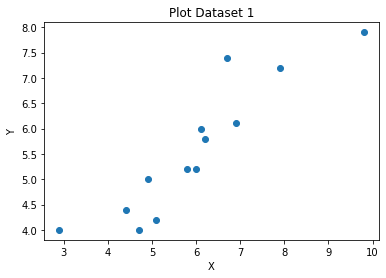

In [7]:
drawScatter(x_points,y_points,"X","Y","Plot Dataset 1")

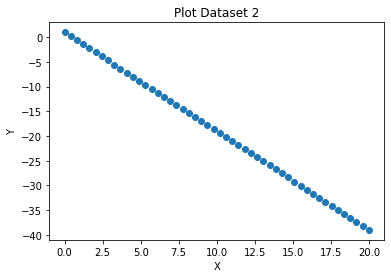

In [8]:
drawScatter(x_points2,y_points2,"X","Y","Plot Dataset 2")

## Gradient

In [9]:
#vectorized, with iteration 
def gradient(x,y,epochs, alpha):
    theta0, theta1 = 0,0
    thetas0 , thetas1, costs,h = [],[],[],[]
    grad0, grad1 = 0,0
    
    for i in range(epochs):
        h = theta0 + theta1 * x
        e = h-y
        cost =  np.sum(np.dot(e,e))/(len(y)*2)
        costs.append(cost)
        thetas0.append(theta0)
        thetas1.append(theta1)
        grad0 = np.sum(e)/len(y)
        grad1 = np.sum(np.dot(e,x))/len(y)
        theta0 = theta0 - alpha* grad0
        theta1 = theta1 - alpha*grad1
    return thetas0, thetas1, costs, h 
    

In [10]:
t0,t1, costs,h = gradient(x_points,y_points,150,0.001)

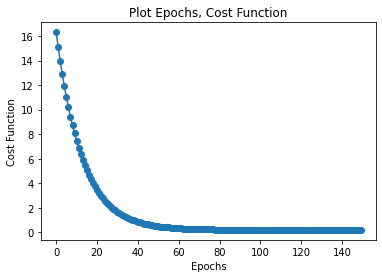

In [11]:
drawScatter2(np.arange(150),costs,"Epochs","Cost Function","Plot Epochs, Cost Function")

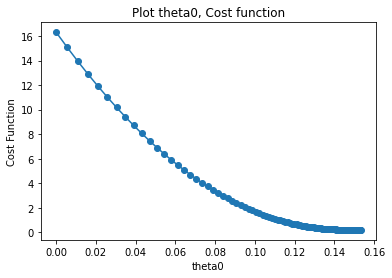

In [12]:
drawScatter2(t0,costs,"theta0","Cost Function","Plot theta0, Cost function")

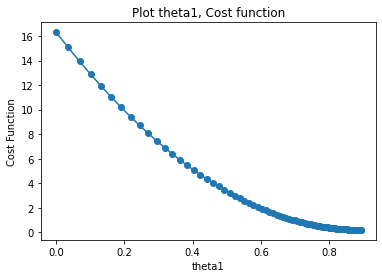

In [13]:
drawScatter2(t1,costs,"theta1","Cost Function","Plot theta1, Cost function")

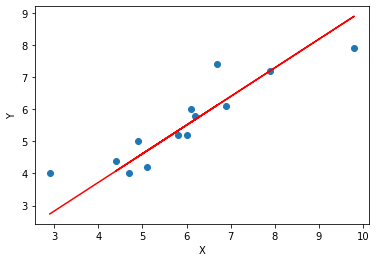

In [14]:
drawRegressionLine(x_points,y_points,"X","Y","",t0[-1],t1[-1])

In [15]:
print("r2 =",r2_score(y_points, h))
print("cost =",costs[-1])

r2 = 0.7480030360920547
cost = 0.20089675832069614


##### Gradient with stopping condition

In [16]:
def gradientWithStoppingCondition(x,y,alpha,threshold):
    theta0, theta1 = 0,0
    thetas0 , thetas1, costs,h = [],[],[],[]
    grad0, grad1 = 0,0
    i=0
    while(True):
        h = theta0 + theta1 * x
        e = h-y
        cost = np.sum(np.dot(e,e))/(len(y)*2)
        costs.append(cost)
        thetas0.append(theta0)
        thetas1.append(theta1)
        grad0 = np.sum(e)/len(y)
        grad1 = np.sum(np.dot(e,x))/len(y)
        theta0 = theta0 - alpha* grad0
        theta1 = theta1 - alpha*grad1
        if(i>0 and costs[-2]-costs[-1]<threshold):
            break
        i+=1
        
    return thetas0, thetas1, costs, h , i


In [17]:
t0,t1,costs,h , iterations = gradientWithStoppingCondition(x_points,y_points,0.001,0.0001)
print(iterations,costs[-1])

121 0.20204981976281938


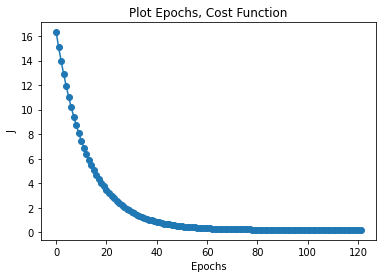

In [18]:
drawScatter2(np.arange(iterations+1),costs,"Epochs","J","Plot Epochs, Cost Function")

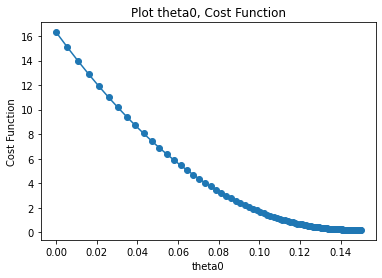

In [19]:
drawScatter2(t0,costs,"theta0","Cost Function","Plot theta0, Cost Function")

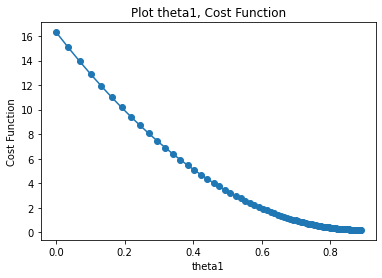

In [20]:
drawScatter2(t1,costs,"theta1","Cost Function","Plot theta1, Cost Function")

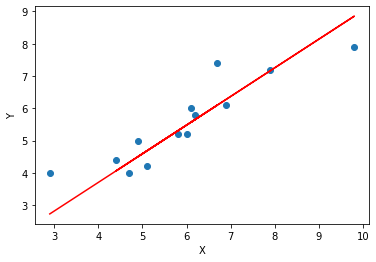

In [21]:
drawRegressionLine(x_points,y_points,"X","Y","",t0[-1],t1[-1])

In [22]:
print("r2 =",r2_score(y_points, h))
print("cost =",costs[-1])

r2 = 0.7465566813323103
cost = 0.20204981976281938
